In [9]:
import os
import scanpy as sc

sc.settings.verbosity = 0
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    frameon=False,
)

In [13]:
adata = sc.read(
    filename="s4d8_feature_selection.h5ad"
)

In [11]:
os.chdir('/Users/juzizhenbutaitian/Desktop/python_sc')

In [15]:
adata.X = adata.layers["log1p_norm"]

In [ ]:
#PCA

In [17]:
# setting highly variable as highly deviant to use scanpy 'use_highly_variable' argument in sc.pp.pca
adata.var["highly_variable"] = adata.var["highly_deviant"]
sc.pp.pca(adata, svd_solver="arpack", use_highly_variable=True)

/opt/anaconda3/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:385: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


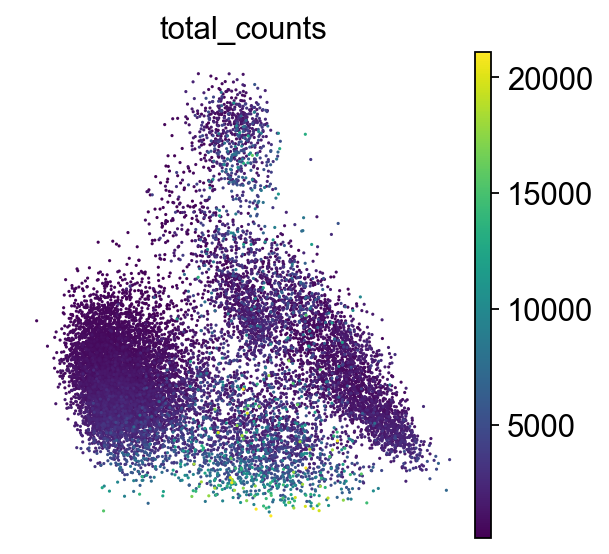

In [19]:
sc.pl.pca_scatter(adata, color="total_counts")

In [ ]:
#T-SNE

In [21]:
sc.tl.tsne(adata, use_rep="X_pca")

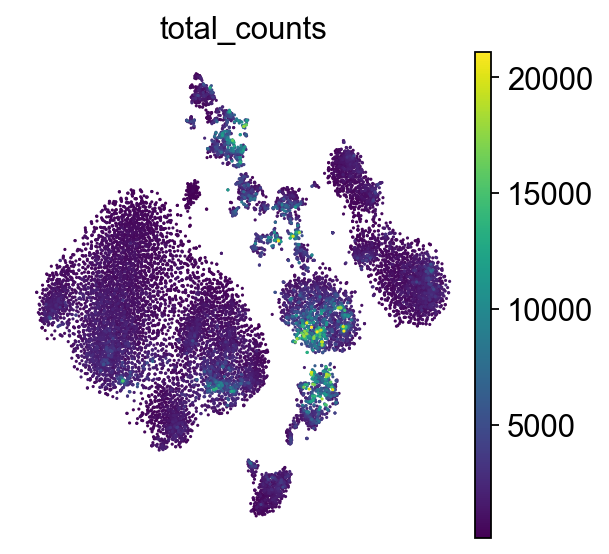

In [22]:
sc.pl.tsne(adata, color="total_counts")

In [ ]:
#UMAP

In [25]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

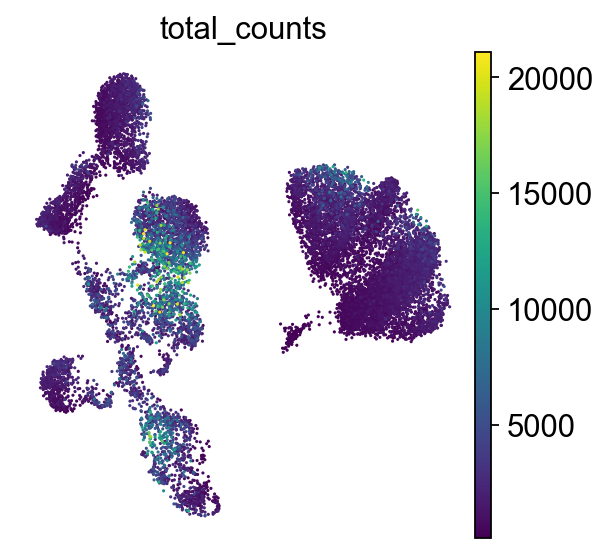

In [26]:
sc.pl.umap(adata, color="total_counts")

In [ ]:
#Inspecting quality control metrices

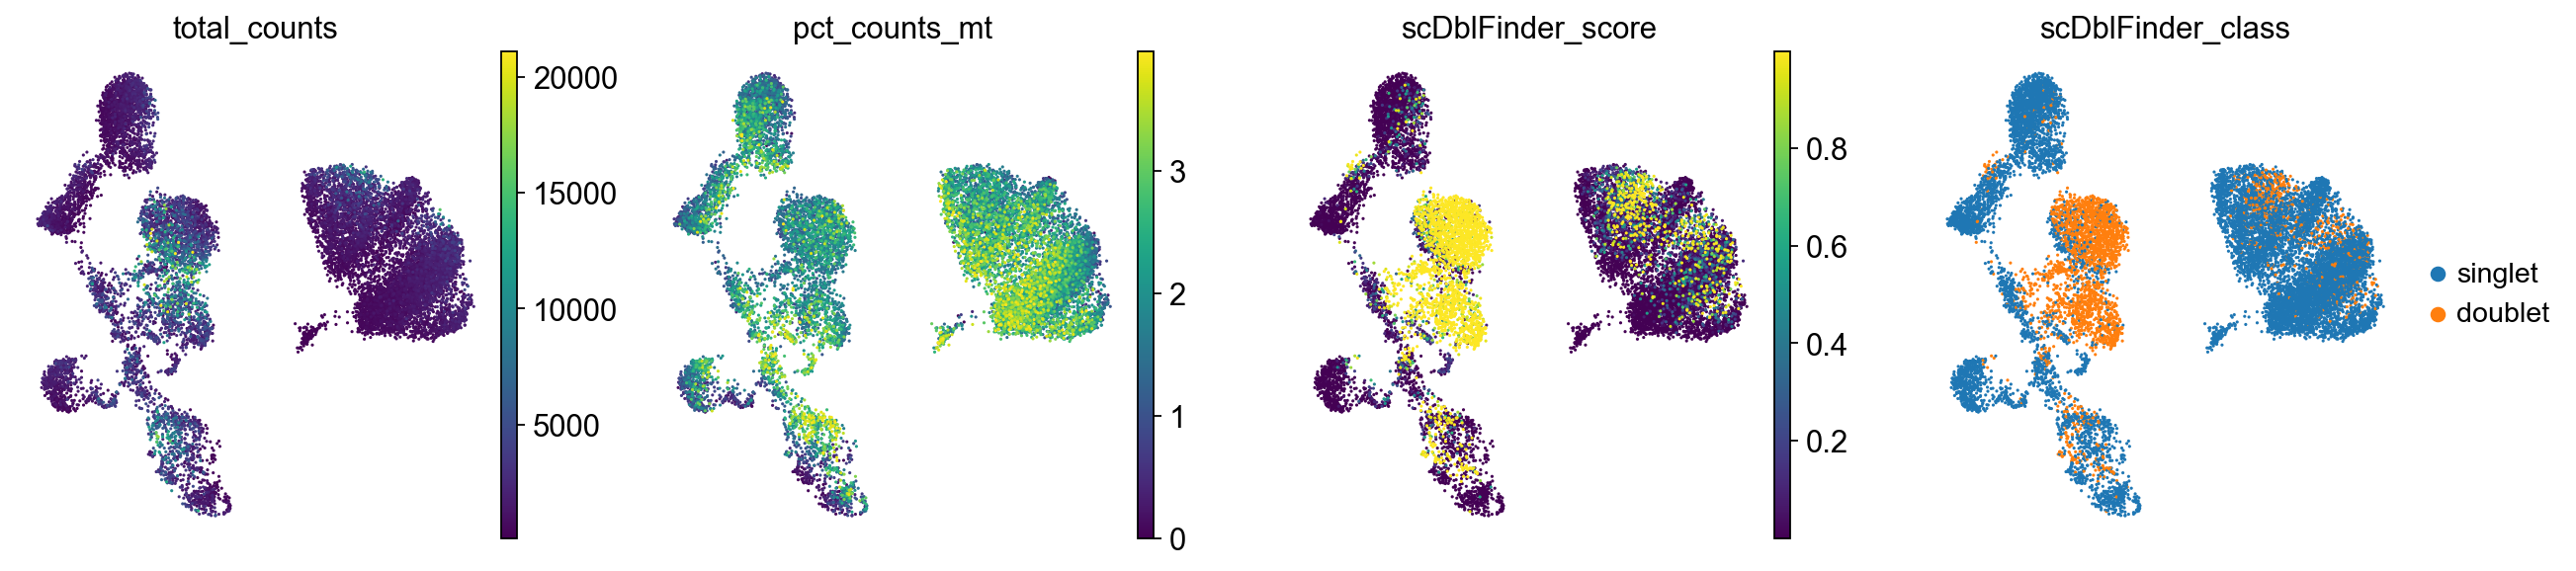

In [27]:
sc.pl.umap(
    adata,
    color=["total_counts", "pct_counts_mt", "scDblFinder_score", "scDblFinder_class"],
)

In [28]:
adata.write("s4d8_dimensionality_reduction.h5ad")